# Model HMXBs using an MCMC algorithm, using available constraints

## Jeff J. Andrews, Andreas Zezas, & Tassos Fragos

Our first goal is to model a HMXB such as PSR J0045-7319 in the SMC:

$$\alpha = 00:45:35.26$$
$$\delta = -73:19:03.32$$
$$P_{\rm orb} = 51.169\ {\rm days} $$
$$e = 0.808$$
$$M_2 \approx 11\ M_{\odot}\ {\rm (B1\ V\ star)}$$ 

In [5]:
import sys
import time
import matplotlib.pyplot as plt

%matplotlib inline

sys.path.append('../SF_history')
import sf_history
sys.path.append('../constants')
import constants
sys.path.append('../binary')
import binary_evolve
sys.path.append('../stats')
import stats


In [6]:
from astropy.coordinates import SkyCoord
from astropy import units as u

coor_J0045 = SkyCoord('00h45m35.26s', '-73d19m03.32s')

ra_J0045 = coor_J0045.ra.degree
dec_J0045 = coor_J0045.dec.degree
M2_d_J0045 = 11.0  # M2 in Msun
P_orb_J0045 = 51.17  # P_orb in days
ecc_J0045 = 0.808  # eccentricity



In [7]:
start_time = time.time()

print "Running PSR J0045-7319"
print "RA:", ra_J0045
print "Dec:", dec_J0045
print "M2_d:", M2_d_J0045
print "P_orb:", P_orb_J0045
print "ecc:", ecc_J0045

sampler = stats.run_emcee(M2_d_J0045, P_orb_J0045, ecc_J0045, ra_J0045, dec_J0045, nburn=10, nsteps=100)

print time.time()-start_time

Running PSR J0045-7319
RA: 11.3969166667
Dec: -73.3175888889
M2_d: 11.0
P_orb: 51.17
ecc: 0.808
126.739448071


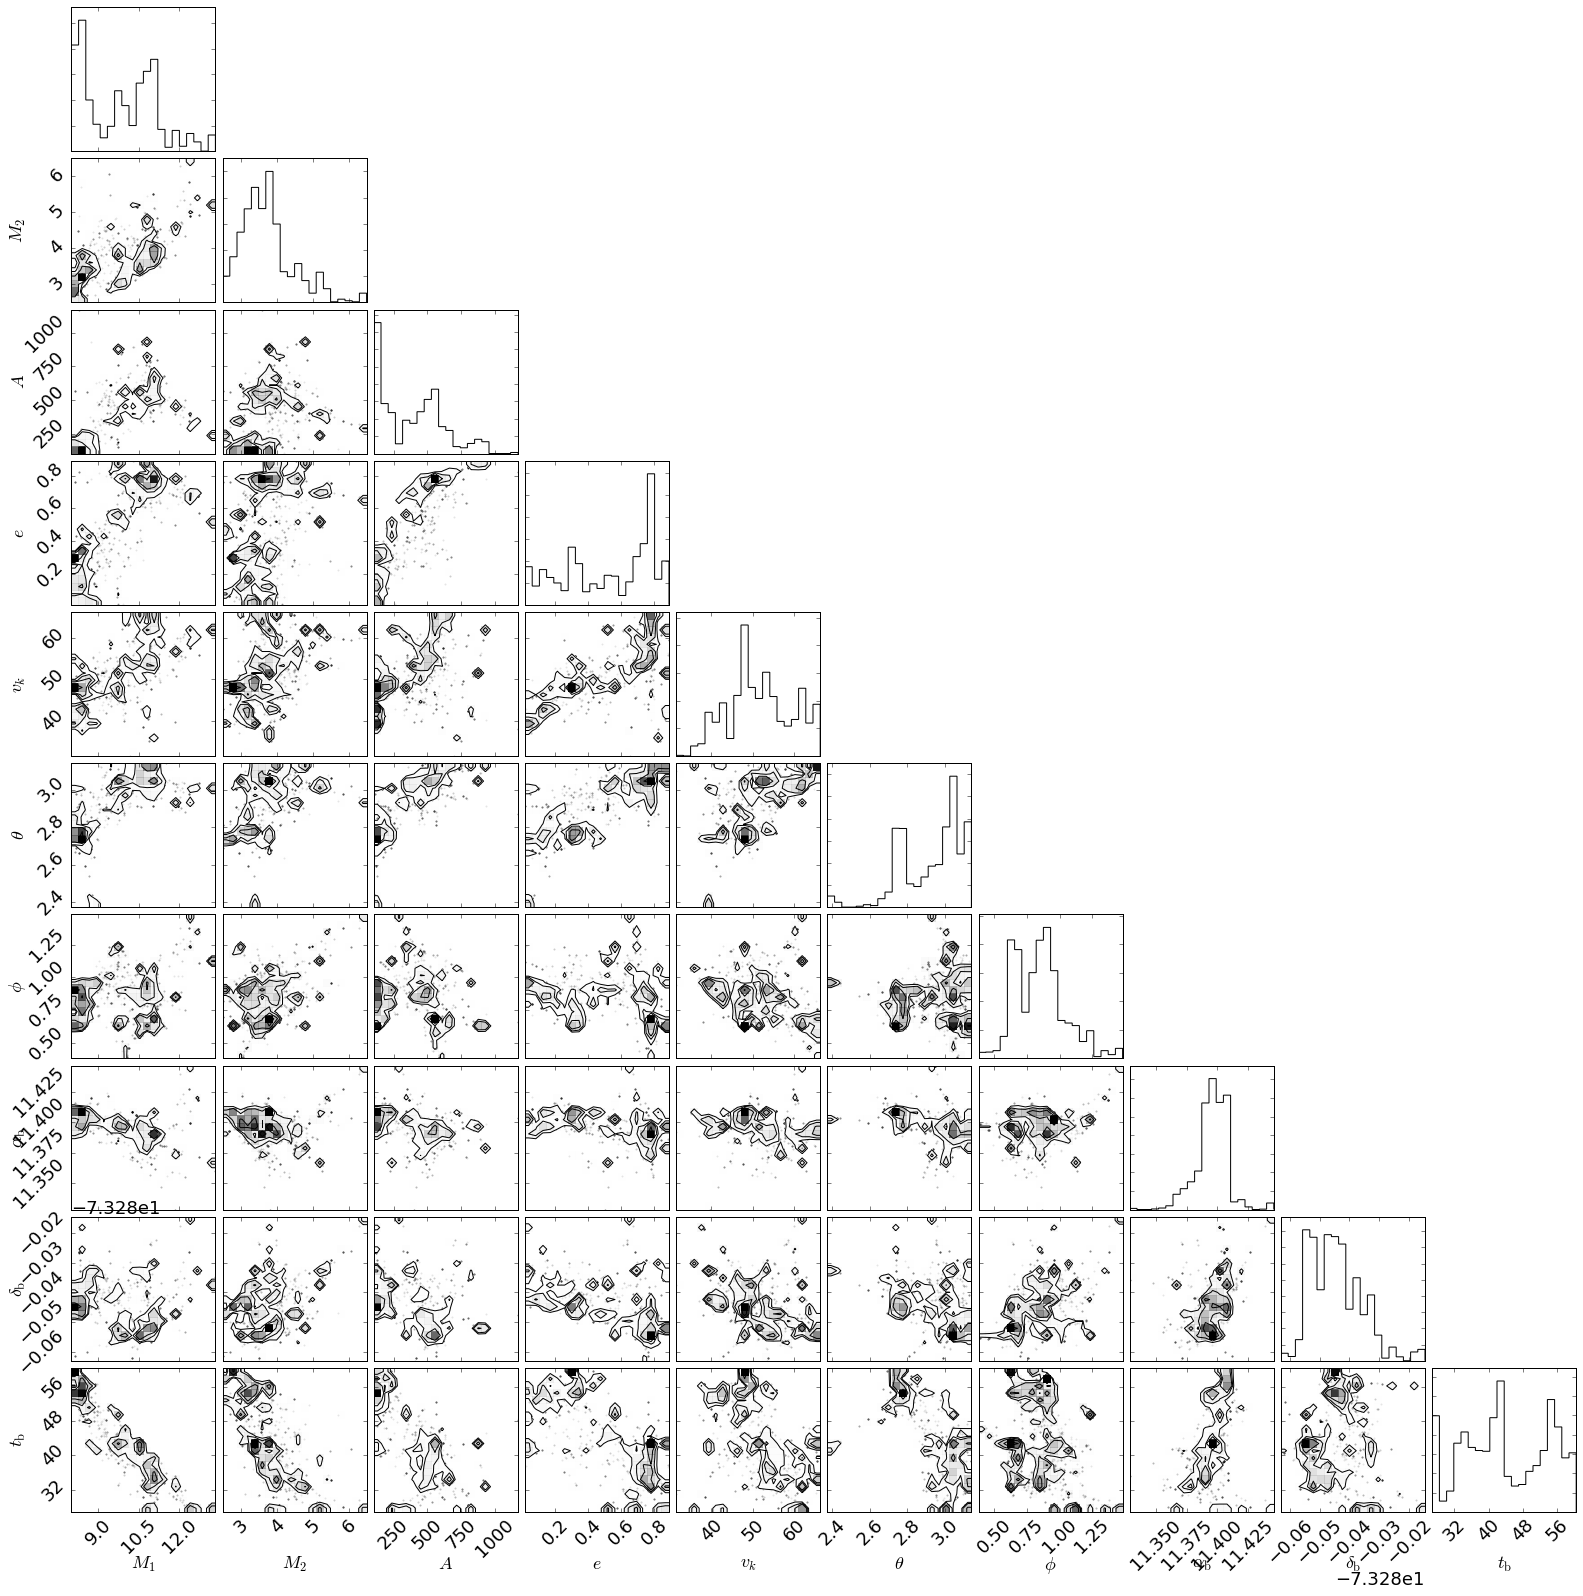

In [8]:
import corner
labels = [r"$M_1$", r"$M_2$", r"$A$", r"$e$", r"$v_k$", r"$\theta$", r"$\phi$", r"$\alpha_{\rm b}$", r"$\delta_{\rm b}$", r"$t_{\rm b}$"]
fig = corner.corner(sampler.flatchain, labels=labels)

plt.rc('font', size=18)

plt.show()
#plt.savefig('../figures/J0045_corner.pdf')

plt.rc('font', size=10)



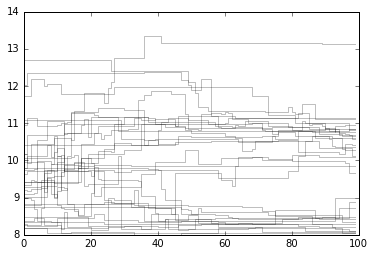

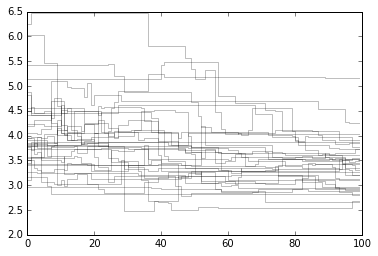

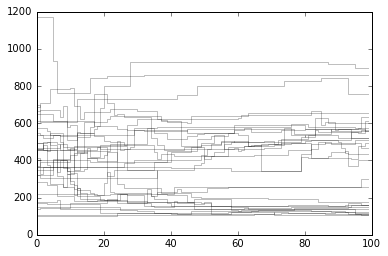

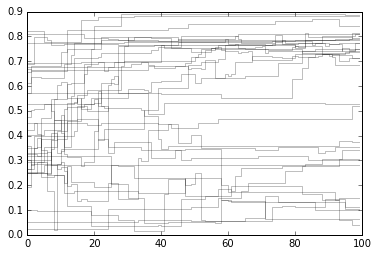

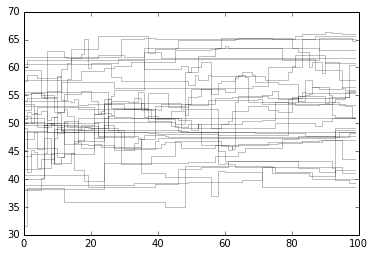

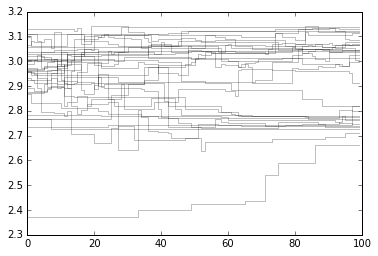

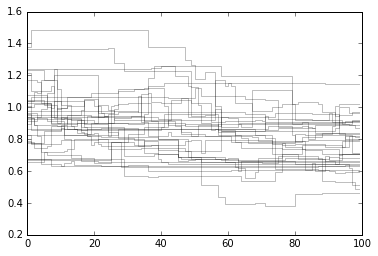

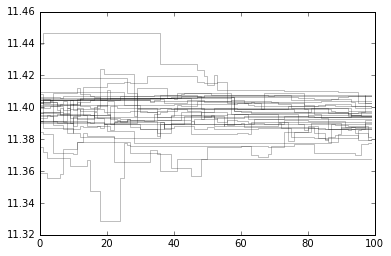

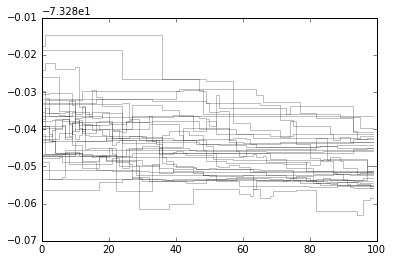

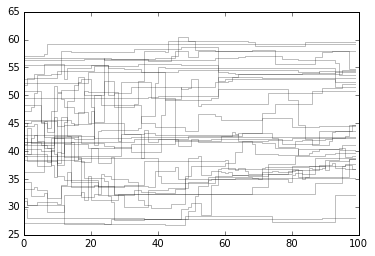

In [9]:
for i in range(sampler.dim):
    plt.figure()
    for chain in sampler.chain[...,i]:
        plt.plot(chain, alpha=0.25, color='k', drawstyle='steps')
        
plt.show()

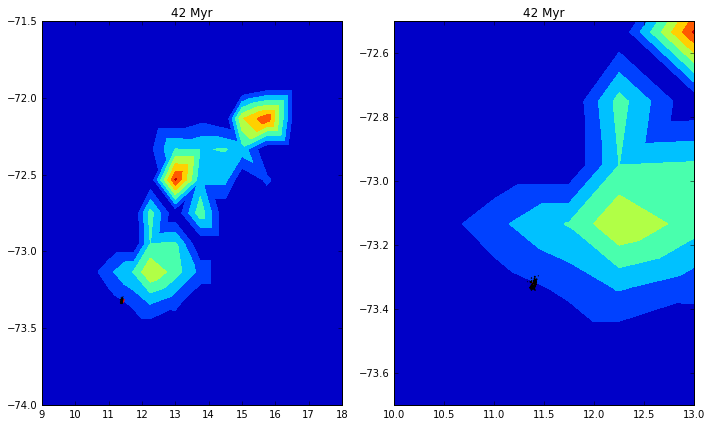

In [10]:
import density_contour

plt.figure(figsize=(10.0, 6.0))

ra_out = sampler.flatchain.T[7]
dec_out = sampler.flatchain.T[8]

plt.subplot(1,2,2)
sf_history.get_SMC_plot(42.0)

plt.scatter(ra_J0045, dec_J0045, marker="*", s=20, color='r')

plt_kwargs = {'colors':'k'}
density_contour.density_contour(ra_out, dec_out, nbins_x=25, nbins_y=25, **plt_kwargs)

plt.xlim(10.0, 13.0)
plt.ylim(-73.7, -72.5)



plt.subplot(1,2,1)
sf_history.get_SMC_plot(42.0)

plt.scatter(ra_J0045, dec_J0045, marker="*", s=20, color='r')

plt_kwargs = {'colors':'k'}
density_contour.density_contour(ra_out, dec_out, nbins_x=25, nbins_y=25, **plt_kwargs)

plt.xlim(9.0, 18.0)
plt.ylim(-74.0, -71.5)


plt.tight_layout()

#plt.savefig('../figures/J0045_dist_birth_location.pdf')
plt.show()